# Exploratory Data Analysis for Movie Lens Data Set

<br>
This data set gives movie review information such as the review score out of 5, the movie name, and genre as well as information about the reviewer like their gender, occupation, and zip code.

In this notebook, I explore the data through plots and split the data up to gain new insights.

<br>
## Load Data and Merge

<br>
Import libraries

In [2]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
import numpy as np

In [4]:
import seaborn

<br>
Get data from `.csv` files

In [3]:
# Read csv file using built in pandas function
# Data is imported as a data frame
users = pd.read_csv('users.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

<br>
Merge data sets

In [6]:
users_ratings = pd.merge(users, ratings)
totalData = pd.merge(users_ratings, movies)

<br>
## Visualize Data

In [7]:
totalData.head()

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


<br>
Plot age distribution. _The age is in ranges where the number gives the bottom of the age range._ This shows that most of the ratings are contributed from people in the 25-35 age range.

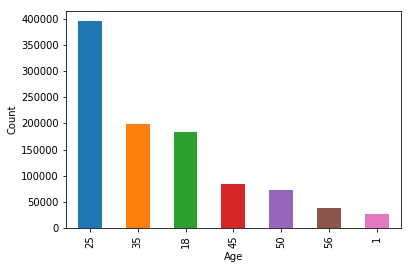

In [8]:
totalData.age.value_counts().plot.bar()
plt.ylabel('Count')
plt.xlabel('Age')
plt.show()

<br>
Plot ratings distribution. Most ratings are from 3.0 to 5.0.

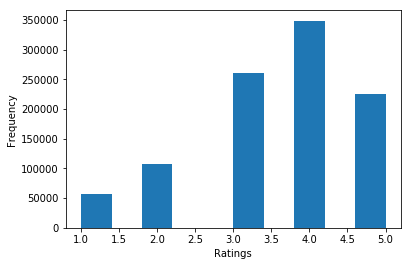

In [9]:
totalData.rating.plot.hist()
plt.xlabel('Ratings')
plt.show()

<br>
Can group by different columns and aggregate using different functions to plot

In [10]:
byTitle = totalData.groupby('title')
aggregate = byTitle.agg({'movie_id':np.count_nonzero, 'rating':np.mean})
aggregate = aggregate.rename(columns={'rating' : 'Average Rating', 'movie_id' : 'Count'})
aggregate.head()

,Count,Average Rating
title,,
"$1,000,000 Duck (1971)",37,3.027027
'Night Mother (1986),70,3.371429
'Til There Was You (1997),52,2.692308
"'burbs, The (1989)",303,2.910891
...And Justice for All (1979),199,3.713568


<br>
Can plot to see that as the number of ratings goes up, so too does the average rating. However, at a low number of ratings, the average rating is much more spread. This is most likely due to the small population size for the averages that leads to less statistically significant results.

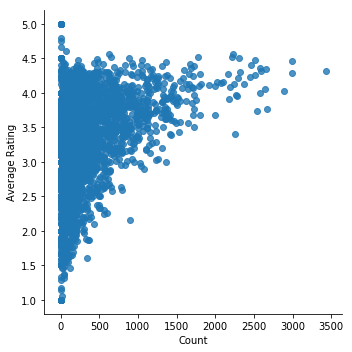

In [44]:
seaborn.lmplot(x='Count',y='Average Rating',data=aggregate,fit_reg=False)

## Manipulating Data

<br>
### Get Highest Rated Movies

<br>
Create a smaller data frame from the total data and group by the title

In [26]:
byTitle = totalData[['title','rating']].groupby('title')

<br>
Get the average rating for each title and sort by the rating

In [27]:
avgRating = byTitle.mean()
avgRating = avgRating.sort_values(by='rating',ascending=False)
avgRating.head()

,rating
title,
Ulysses (Ulisse) (1954),5.0
Lured (1947),5.0
Follow the Bitch (1998),5.0
Bittersweet Motel (2000),5.0
Song of Freedom (1936),5.0


<br>
Create an array for the top rated movies and store top rating and movie names

In [29]:
mostPop = []
topRating = avgRating.iloc[0]['rating']

<br>
Loop through and get all of the movies that are tied for the top rating

In [59]:
mostPop.append(avgRating.index[0])

for i in range(0,avgRating.size):
    if avgRating.iloc[i]['rating'] == topRating:
        mostPop.append(avgRating.index[i])
        
mostPop

['Ulysses (Ulisse) (1954)',
 'Ulysses (Ulisse) (1954)',
 'Lured (1947)',
 'Follow the Bitch (1998)',
 'Bittersweet Motel (2000)',
 'Song of Freedom (1936)',
 'One Little Indian (1973)',
 'Smashing Time (1967)',
 'Schlafes Bruder (Brother of Sleep) (1995)',
 'Gate of Heavenly Peace, The (1995)',
 'Baby, The (1973)',
 'Ulysses (Ulisse) (1954)',
 'Ulysses (Ulisse) (1954)',
 'Lured (1947)',
 'Follow the Bitch (1998)',
 'Bittersweet Motel (2000)',
 'Song of Freedom (1936)',
 'One Little Indian (1973)',
 'Smashing Time (1967)',
 'Schlafes Bruder (Brother of Sleep) (1995)',
 'Gate of Heavenly Peace, The (1995)',
 'Baby, The (1973)']

<br>
### Get Popular Movies That Are Low Rated

<br>
Group by title again, but this time get the count and average

In [34]:
byTitle = totalData[['title','rating']].groupby('title')
byTitleAvg = byTitle.mean()
byTitleCount = byTitle.count()
byTitleCount = byTitleCount.rename(columns={'rating' : 'count'})

print(byTitleAvg.head())
print(byTitleCount.head())

                                 rating
title                                  
$1,000,000 Duck (1971)         3.027027
'Night Mother (1986)           3.371429
'Til There Was You (1997)      2.692308
'burbs, The (1989)             2.910891
...And Justice for All (1979)  3.713568
                               count
title                               
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199


<br>
Only choose movies where the rating is less than 2.0 and sort by the number of reviews

In [36]:
badMovies = byTitleCount[byTitleAvg['rating'] < 2.0]
badMovies = badMovies.sort_values(by='count',ascending=False)
badMovies.head()

,count
title,
Speed 2: Cruise Control (1997),367
Super Mario Bros. (1993),350
Battlefield Earth (2000),342
Superman IV: The Quest for Peace (1987),332
Grease 2 (1982),303


<br>
Get all bad movies that are tied for highest number of ratings

In [58]:
popBadCount = badMovies.iloc[0]['count']
names = badMovies.index

popBad = []
popBad.append(badMovies.index[0])

for i in range(1,badMovies.size):
    if badMovies.iloc[i]['count'] == popBadCount:
        popBad.append(badMovies.index[i])
    else:
        break
        
popBad

['Speed 2: Cruise Control (1997)']

<br>
### Get Movies with High Ratings by Men and Low Ratings by Women

<br>
Make a pivot table of the ratings by gender and movie title

In [47]:
genderPT = totalData.pivot_table(values='rating',columns='gender',index='title',aggfunc='mean')
genderPT.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


<br>
Check if any missing data and remove

In [50]:
genderPT.isnull().any()

gender
F    True
M    True
dtype: bool

In [51]:
genderPT.dropna(inplace=True)
genderPT.isnull().any()

gender
F    False
M    False
dtype: bool

<br>
Create a new column representing the difference between the males' average rating and the females' average rating

In [52]:
genderPT['diff'] = genderPT['M'] - genderPT['F']
genderPT.head()

gender,F,M,diff
title,,,
"$1,000,000 Duck (1971)",3.375000,2.761905,-0.613095
'Night Mother (1986),3.388889,3.352941,-0.035948
'Til There Was You (1997),2.675676,2.733333,0.057658
"'burbs, The (1989)",2.793478,2.962085,0.168607
...And Justice for All (1979),3.828571,3.689024,-0.139547


<br>
Rank by the difference so that movies with both a high male rating and low female rating are at the top

In [54]:
genderPT = genderPT.sort_values(by='diff', ascending=False)
genderPT.head()

gender,F,M,diff
title,,,
Tigrero: A Film That Was Never Made (1994),1.0,4.333333,3.333333
"Neon Bible, The (1995)",1.0,4.000000,3.000000
"Enfer, L' (1994)",1.0,3.750000,2.750000
Stalingrad (1993),1.0,3.593750,2.593750
Killer: A Journal of Murder (1995),1.0,3.428571,2.428571


In [56]:
maleNotFemale = genderPT.index[0]
maleNotFemale

'Tigrero: A Film That Was Never Made (1994)'